# LABORATORIO 1, ANÁLISIS NÚMERICO II

Daniela Paz Díaz Mora 

201710003-6

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import math
from scipy.misc import derivative
import scipy

## Ejercicio 2: 9.1 Trefethen

#### Codigos en MatLab 

x=(-128:128)'/128;

A=[x.^0 x.^1 x.^2 x.^3];

[Q,R]=qr(A,0);

scale=Q(257,:);
Q=Q*diag(1 ./scale);
plot(Q)

### **a.**

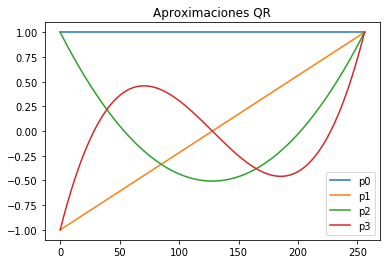

In [2]:
x=np.arange(-128,129)/128 #set x to a discretization of [-1,1]
A=np.array([list(x**0),list(x**1),list(x**2),list(x**3)]).transpose() #construct Vandermonde matrix
Q,R=np.linalg.qr(A) #find its reduced QR factorization

###########################################################################################################

scale=Q[256] #Select last row of Q
Q=np.dot(Q,np.diag(list(1/scale))) #Rescale columns by these numbers
plt.plot(Q) #plot Q
plt.legend(('p0','p1','p2','p3'))
plt.title('Aproximaciones QR')
plt.show()

### **b.**

In [3]:
Legendre_polinomial=np.array([[1]*257,x,(x**2)*3/2-1/2,(x**3)*5/2-3*x/2]).transpose()

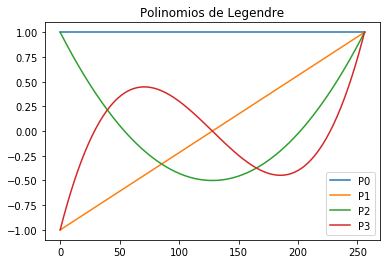

In [4]:
plt.plot(Legendre_polinomial)
plt.legend(('P0','P1','P2','P3'))
plt.title('Polinomios de Legendre')
plt.show()

Aparentemente los dos graficos se ven iguales

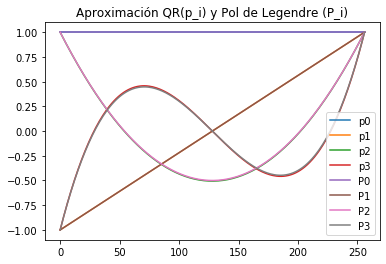

In [5]:
plt.plot(np.concatenate((Q,Legendre_polinomial),axis=1))
plt.legend(('p0','p1','p2','p3','P0','P1','P2','P3'))
plt.title('Aproximación QR(p_i) y Pol de Legendre (P_i)')
plt.show()

de esta forma podemos notar las pequeñas diferencias, si calculamos la matriz de error

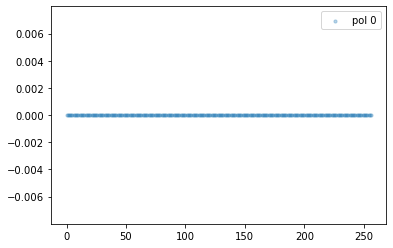

In [6]:
plt.scatter(np.arange(0,257),(Q-Legendre_polinomial).transpose()[0],label='pol 0',s=10,alpha=0.3)
plt.legend()
plt.show()

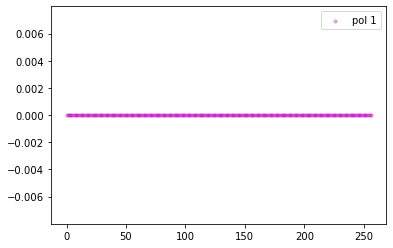

In [7]:
plt.scatter(np.arange(0,257),(Q-Legendre_polinomial).transpose()[1],label='pol 1',color='m',alpha=0.3,s=10)
plt.legend()
plt.show()

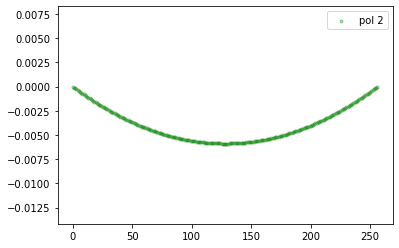

In [8]:
plt.scatter(np.arange(0,257),(Q-Legendre_polinomial).transpose()[2],label='pol 2',color='g',alpha=0.3,s=10)
plt.legend()
plt.show()

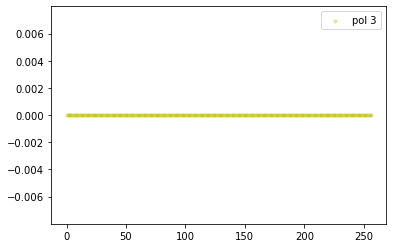

In [9]:
plt.scatter(np.arange(0,257),(Q-Legendre_polinomial).transpose()[1],label='pol 3',color='y',alpha=0.3,s=10)
plt.legend()
plt.show()

#### **__Podemos apreciar claramente que los errores se comportan de una forma lineal con pendiente e intercepto 0, i.e, los error son practicamente 0 en los casos del polinomio de grado 0,1 y 3, en en el caso del polinomio de grado 2 podemos apreciar que los errores se comportan de forma cuadratica aunque siguen siendo muy pequeños__**

### **c.**

In [23]:
#utilizando numconvorde del lab 1
def numconvorder(h,err):
    alpha=[]
    C=[]
    for j in range(0,len(h)-1): #itera k-1 veces asi los vectores pedidos si pertenecen a R^{k-1} y no se produce error de indice
            alpha.append(np.log2(err[j]/err[j+1]))
            #print(err[j])
            #print(err[j+1])
            #print(np.log2(err[j]/err[j+1]))
            C.append(err[j]/(h[j]**alpha[j]))
    return alpha,C
err0=(Q-Legendre_polinomial).transpose()[0]
err1=(Q-Legendre_polinomial).transpose()[1]
err2=(Q-Legendre_polinomial).transpose()[2]
err3=(Q-Legendre_polinomial).transpose()[3]

h=[]
for i in range(1,9):
    h.append(2**(i))
a_0,c0=numconvorder(h,err0)
a_1,c1=numconvorder(h,err1)
a_2,c2=numconvorder(h,err2)
a_3,c3=numconvorder(h,err3)

print('convergencia p0:\n',a_0)
print('convergencia p1:\n',a_1)
print('convergencia p2:\n',a_2)
print('convergencia p3:\n',a_3)



convergencia p0:
 [2.807354922057604, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
convergencia p1:
 [-1.1699250014423124, inf, nan, -inf, inf, -inf, inf]
convergencia p2:
 [-35.67807190511264, -0.9943312499163868, -0.579271388640526, -0.4093238480846042, -0.3161917253377805, -0.257275136545263, -0.21661006874242655]
convergencia p3:
 [-41.90312867681863, -0.9829264866346603, -0.56777574980494, -0.39773587380969794, -0.30450992029059676, -0.24549796876880464, -0.20473596845418182]


/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Teniendo asi que en el para p_0 converge rapidamente a 0
Teniendo asi que en el para p_1 no converge para h(v)=2^v, v>1
Teniendo asi que en el para p_2  converge desde los negativos a 0
Teniendo asi que en el para p_3  converge desde los negativos a 0


## Ejercicio 3.b

In [11]:
def mypinv(A):
    U, S, V= scipy.linalg.svd(A)
    m,n=A.shape
    #construyo la matriz S, ya que S solo me entrega los elementos para una matriz cuadrada
    if m>n:
        S=np.append(np.diag(S),np.zeros((n,m-n)),axis=1)
    elif m<n:
        S= np.append(np.diag(S),np.zeros((m,n-m)),axis=1)
        S=S.T
    elif m==n:
        S=np.diag(S)
    # 'invierto' los valores no nulos de la matriz Z 
    for i in range(0,S.shape[0]):
        for j in range(0,S.shape[1]):
            if np.abs(S[i,j]) > 0.0000001:
                S[i,j] = 1/(S[i,j])
            else:
                S[i,j] = 0
    
    return np.dot(np.dot(V.T,S),U.T)

In [26]:
Ap1=mypinv(np.matrix([[1,1],[0,0]]))
Ap2=mypinv(np.matrix([[1],[2]]))
Ap3=mypinv(np.matrix([[1,1,1],[2,2,2]]))
print('Matriz Ap1:\n',Ap1,'\n Matriz Ap2:\n',Ap2,'\n Matriz Ap3:\n',Ap3)

Matriz Ap1:
 [[0.5 0. ]
 [0.5 0. ]] 
 Matriz Ap2:
 [[0.2 0.4]] 
 Matriz Ap3:
 [[0.06666667 0.13333333]
 [0.06666667 0.13333333]
 [0.06666667 0.13333333]]
